In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('ad_campaign_performance.csv')

In [3]:
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


# Data preparation

In [8]:
df.shape

(1000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [5]:
df.isnull().sum()

Campaign_ID        0
Budget             0
Duration           0
Platform           0
Content_Type       0
Target_Age         0
Target_Gender      0
Region             0
Clicks             0
Conversions        0
CTR                0
CPC                0
Conversion_Rate    0
Success            0
dtype: int64

In [6]:
df.describe()

,Budget,Duration,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24592.139000,31.692000,25130.92700,2480.360000,388.988301,2.968978,26.856985,0.897000
std,14632.696566,16.542999,14205.44793,1449.470849,1544.579703,15.660721,88.893199,0.304111
min,109.000000,3.000000,98.00000,13.000000,0.232358,0.003153,0.036164,0.000000
25%,11480.000000,17.000000,13225.25000,1222.750000,52.635433,0.468196,4.889723,1.000000
50%,23965.000000,32.000000,25013.50000,2407.000000,102.213286,0.978351,9.847713,1.000000
75%,37953.750000,46.000000,37386.50000,3771.250000,213.586455,1.899861,18.757727,1.000000
max,49950.000000,60.000000,49820.00000,4995.000000,31711.612903,430.370690,1554.121864,1.000000


# Exploratory data analysis

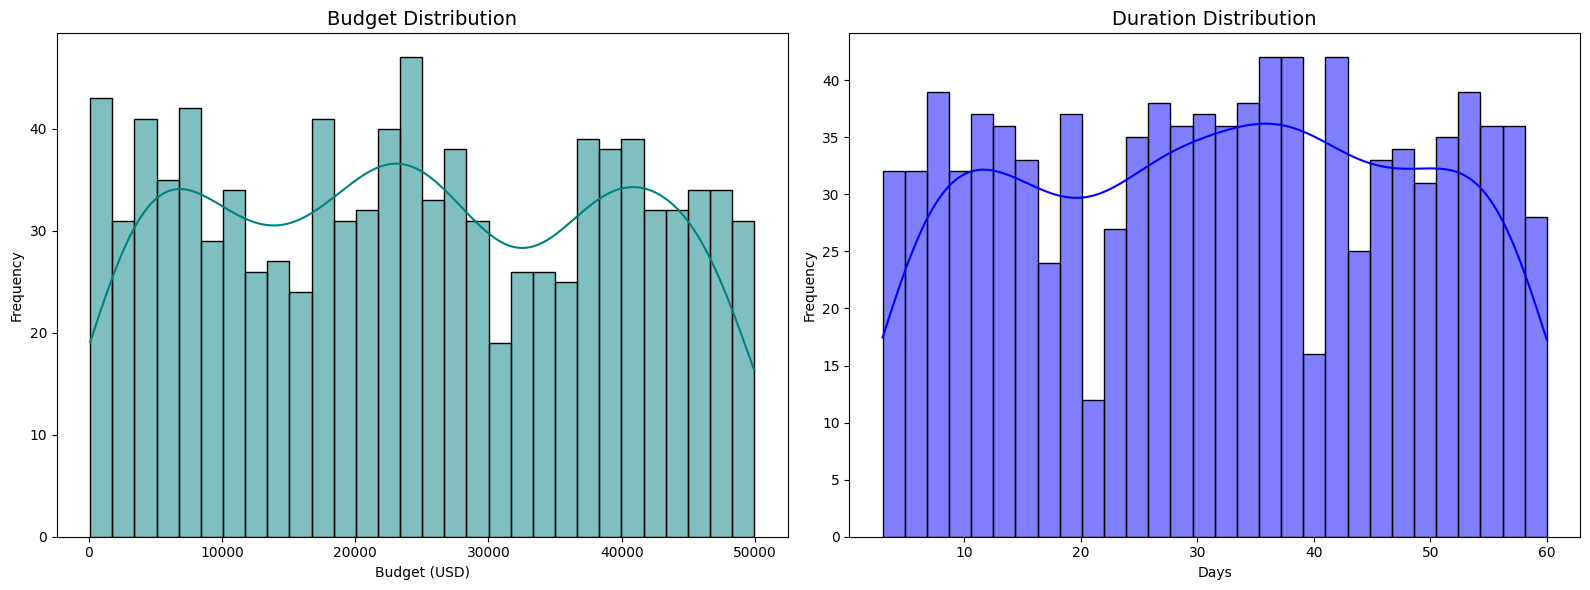

In [25]:
# Distribution charts for budget and duration
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(
    df['Budget'],
    kde=True,
    bins=30,
    color='teal'
)
plt.title("Budget Distribution",size=14)
plt.xlabel('Budget (USD)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(
    df['Duration'],
    kde=True,
    bins=30,
    color='blue'
)
plt.title("Duration Distribution",size=14)
plt.xlabel('Days')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

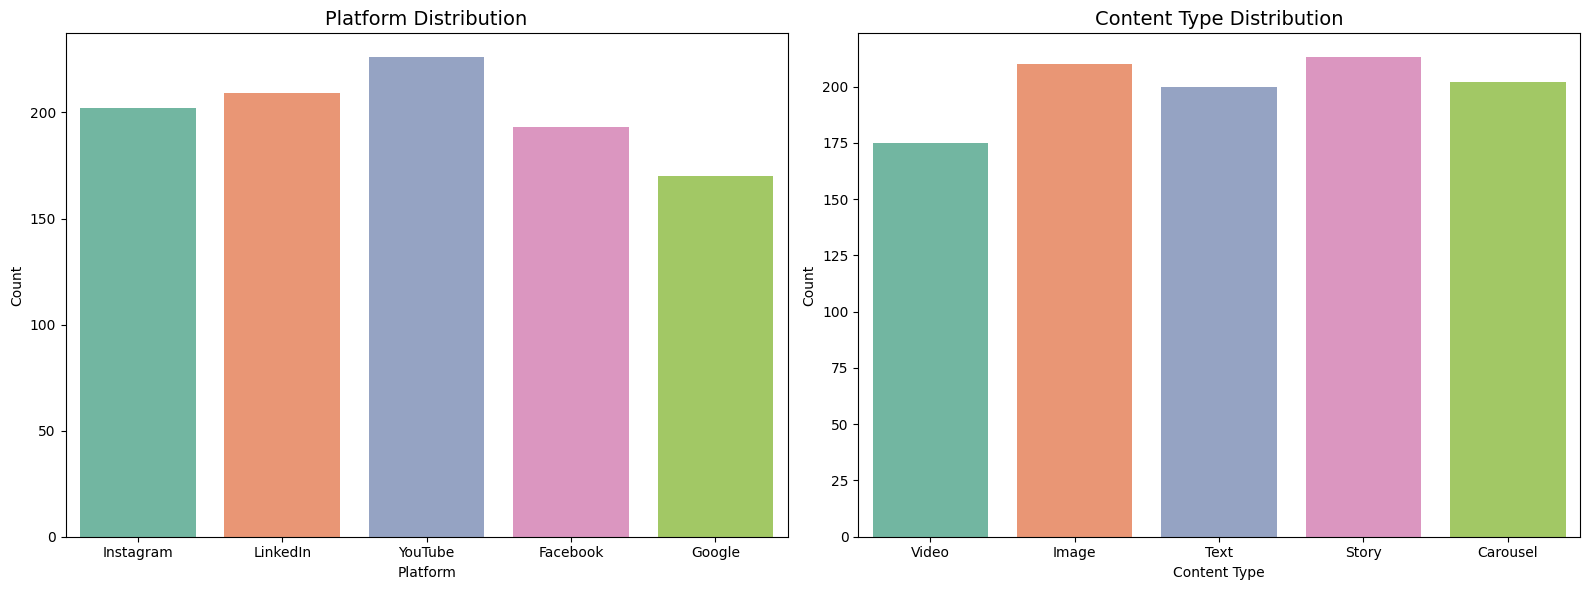

In [33]:
# Platform and content type distribution
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(
    data=df,
    x='Platform',
    palette='Set2',
    hue='Platform'
)
plt.title("Platform Distribution",size=14)
plt.ylabel("Count")



plt.subplot(1,2,2)
sns.countplot(
    data=df,
    x='Content_Type',
    palette='Set2',
    hue='Content_Type'
)
plt.title("Content Type Distribution",size=14)
plt.ylabel("Count")
plt.xlabel("Content Type")
plt.tight_layout()
plt.show()

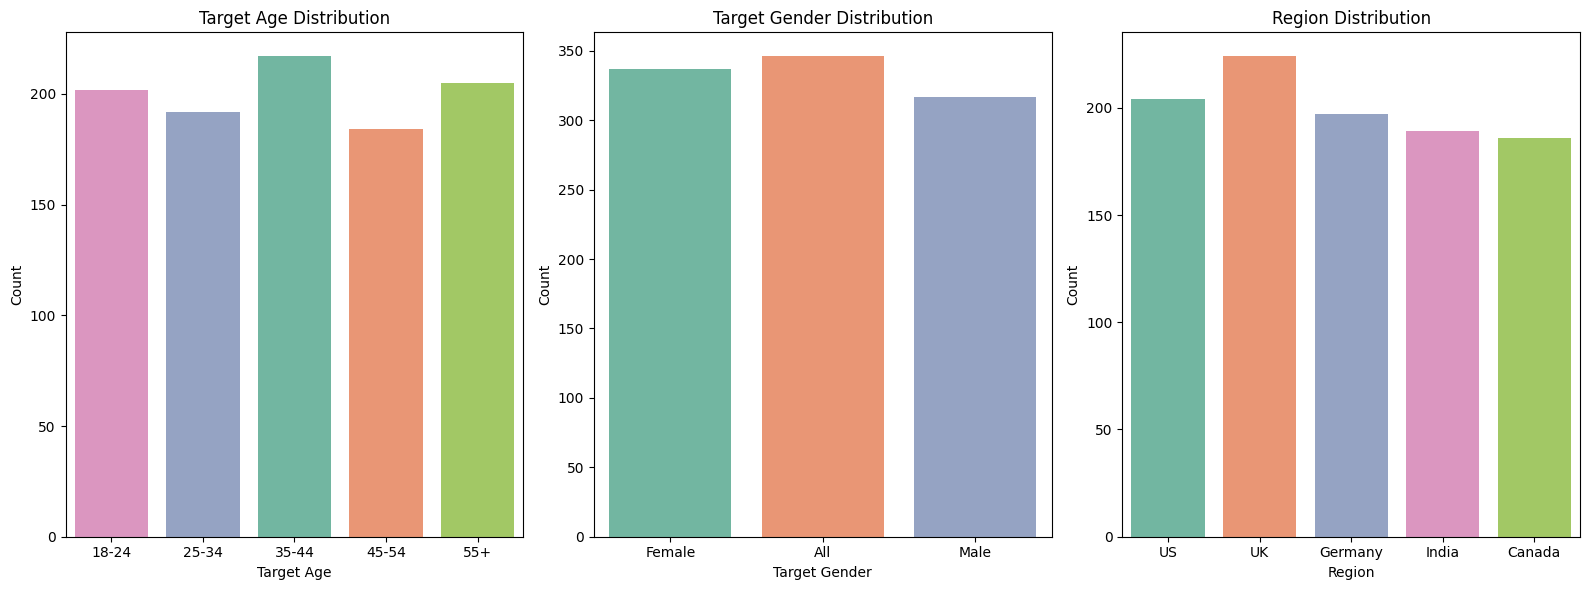

In [44]:
# Demographics distribution (target age, gender, region)

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.countplot(
    data=df,
    x='Target_Age',
    palette='Set2',
    hue='Target_Age',
    order=['18-24', '25-34', '35-44', '45-54', '55+']
)
plt.title("Target Age Distribution")
plt.xlabel("Target Age")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.countplot(
    data=df,
    x='Target_Gender',
    palette='Set2',
    hue='Target_Gender',
   
)
plt.title("Target Gender Distribution")
plt.xlabel("Target Gender")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.countplot(
    data=df,
    x='Region',
    palette='Set2',
    hue='Region',
   
)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")



plt.tight_layout()
plt.show()


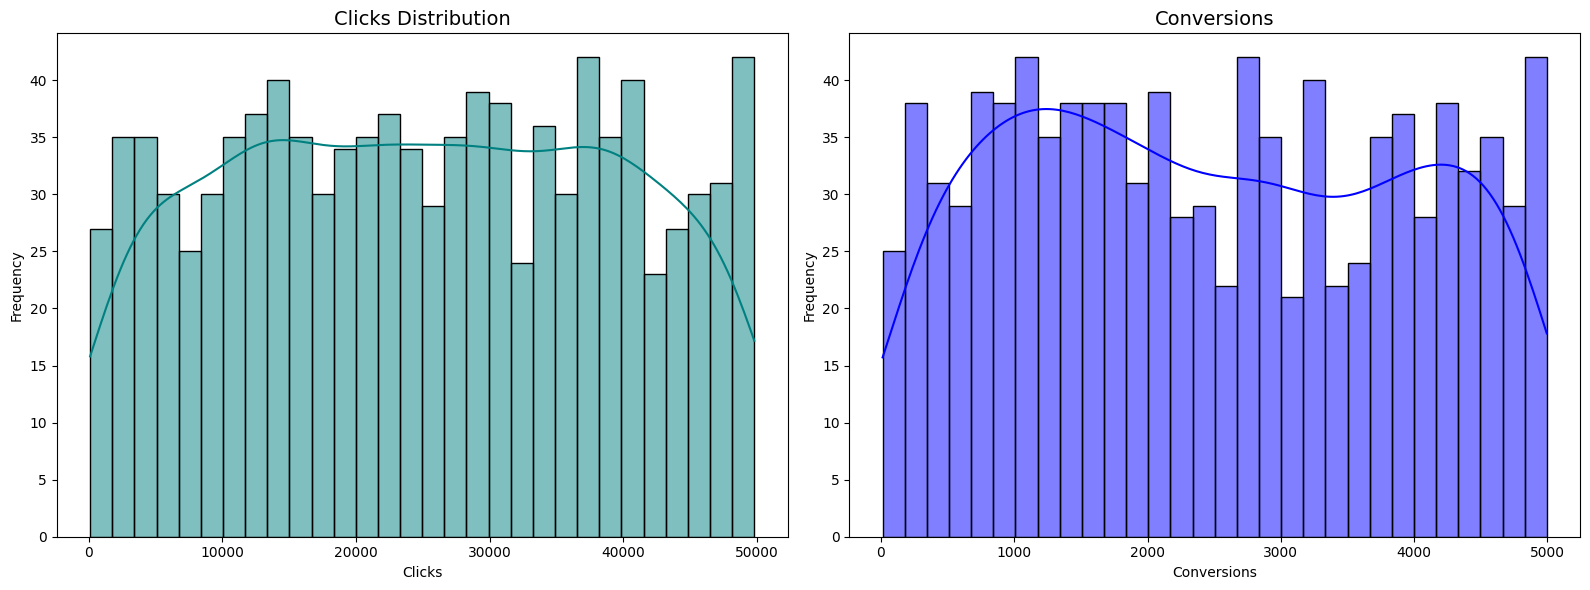

In [45]:
# Clicks and conversion histograms

# Distribution charts for budget and duration
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(
    df['Clicks'],
    kde=True,
    bins=30,
    color='teal'
)
plt.title("Clicks Distribution",size=14)
plt.xlabel('Clicks')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(
    df['Conversions'],
    kde=True,
    bins=30,
    color='blue'
)
plt.title("Conversions Distribution",size=14)
plt.xlabel('Conversions')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

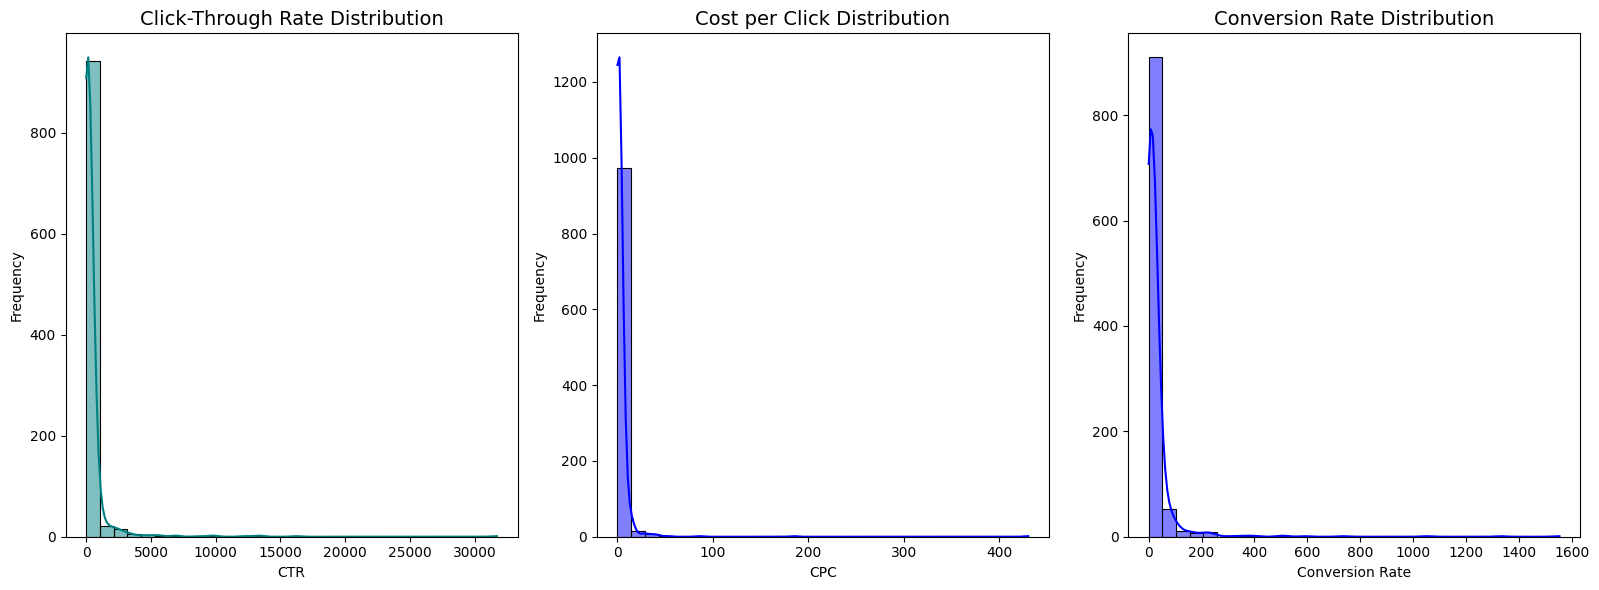

In [46]:
#CTR (Click-Through Rate) – (Clicks / Budget) * 100
#CPC (Cost Per Click) – (Budget / Clicks)
#Conversion_Rate – (Conversions / Clicks) * 100


# Clicks and conversion histograms

# Distribution charts for budget and duration
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.histplot(
    df['CTR'],
    kde=True,
    bins=30,
    color='teal'
)
plt.title("Click-Through Rate Distribution",size=14)
plt.xlabel('CTR')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.histplot(
    df['CPC'],
    kde=True,
    bins=30,
    color='blue'
)
plt.title("Cost per Click Distribution",size=14)
plt.xlabel('CPC')
plt.ylabel('Frequency')




plt.subplot(1,3,3)
sns.histplot(
    df['Conversion_Rate'],
    kde=True,
    bins=30,
    color='blue'
)
plt.title("Conversion Rate Distribution",size=14)
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

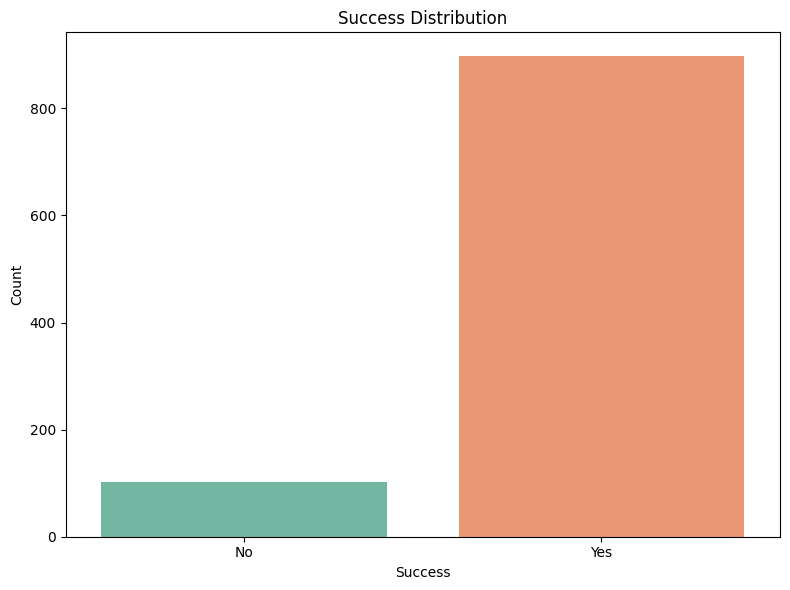

In [52]:
# Success distribution

plt.figure(figsize=(8,6))

sns.countplot(
    data=df,
    x='Success',
    palette='Set2',
    hue='Success',
    legend=False

)
plt.title("Success Distribution")
plt.xlabel("Success")

plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()